In [904]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# DATA ISSUES

In [905]:
df_train = pd.read_csv("health_train.csv")
df_test  = pd.read_csv("health_test.csv")

In [906]:
df_train.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [907]:
df_train.describe()

,age,bmi,children,charges
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,39.003033,30.575497,2.488400,12679.311518
std,12.264536,5.390169,1.707346,10593.270485
min,18.000000,15.960000,0.000000,1121.873900
25%,28.845667,26.717647,1.000000,5612.780878
50%,39.350208,30.200000,2.000000,9455.047274
75%,48.688741,34.046166,4.000000,14440.628060
max,64.000000,53.130000,5.000000,63770.428010


In [908]:
df_test.head()

,age,sex,bmi,smoker,region,children
0,39.296556,male,29.978109,no,northwest,4
1,40.367560,female,27.927669,no,southeast,5
2,32.881563,male,41.576865,no,southwest,5
3,62.000000,female,30.495000,no,northwest,2
4,32.476173,male,30.322774,yes,northeast,4


In [909]:
df_train.age.value_counts()

18.000000    57
19.000000    52
48.000000    43
39.000000    43
33.000000    35
             ..
50.783648     1
51.874688     1
45.355580     1
30.349726     1
36.833818     1
Name: age, Length: 1347, dtype: int64

In [910]:
df_train["age"]=df_train.age.round()

In [911]:
df_train.bmi.value_counts()

32.300000    9
28.310000    8
33.330000    7
31.350000    7
38.060000    7
            ..
25.733791    1
30.073584    1
33.390884    1
30.777848    1
36.640579    1
Name: bmi, Length: 2008, dtype: int64

# EDA

<AxesSubplot:>

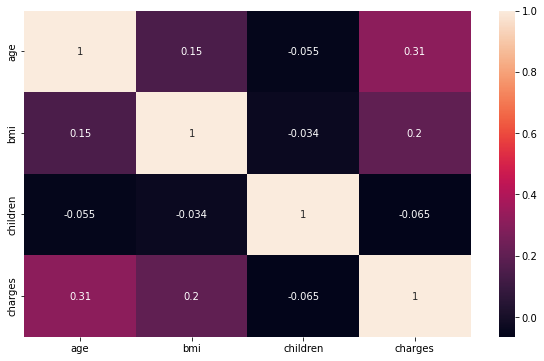

In [912]:
sns.heatmap(df_train.corr(), annot = True)

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

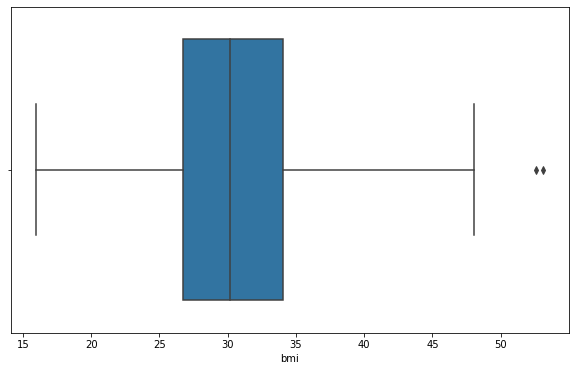

In [913]:
sns.boxplot(df_train.bmi,whis=2)

In [914]:
df_train=df_train[df_train.bmi<50]

In [915]:
df_train=df_train[df_train.charges<20500]

In [916]:
len(df_train[df_train.charges>15000])

215

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

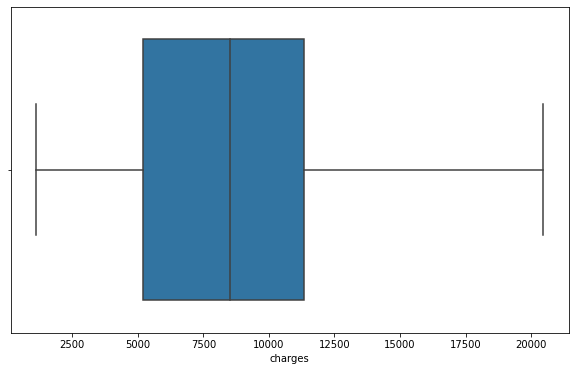

In [917]:
sns.boxplot(df_train.charges)

<AxesSubplot:xlabel='age', ylabel='charges'>

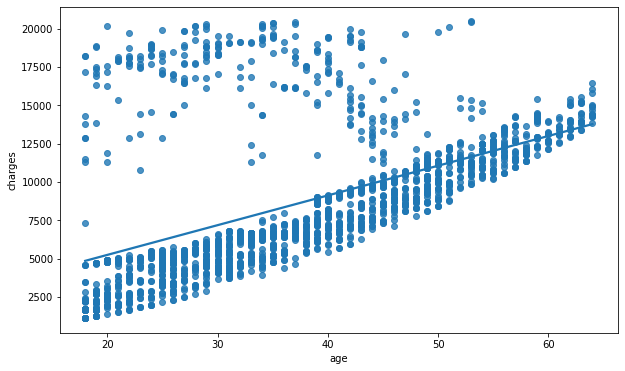

In [918]:
sns.regplot(x="age",y="charges",data=df_train,ci=None)

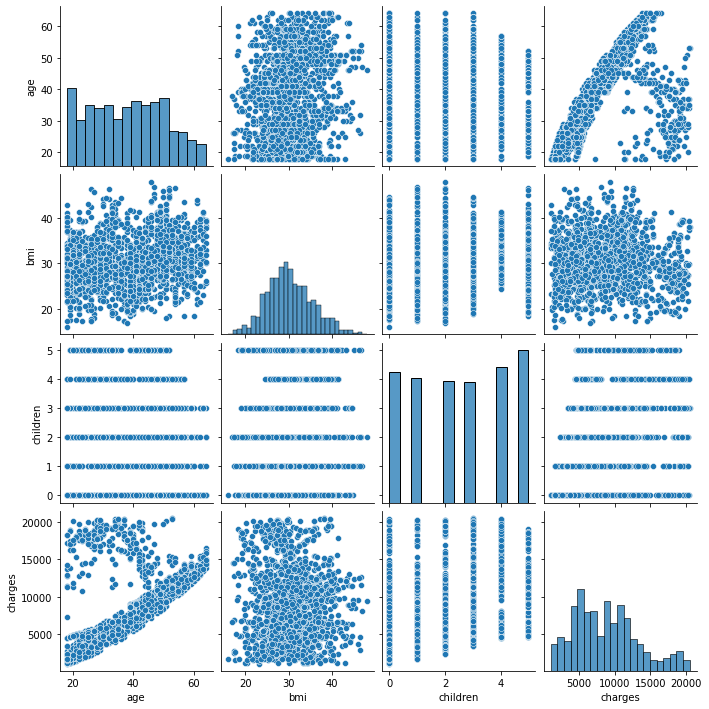

In [919]:
sns.pairplot(df_train)

In [920]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)
df_test.shape,df_train.shape

((451, 11), (2108, 12))

# Split and scale

In [921]:
y=df_train.charges
X=df_train.drop(["charges"],axis=1)

In [922]:
from sklearn.model_selection import train_test_split

In [923]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [924]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [925]:
scaler.fit(X_train)

StandardScaler()

In [926]:
X_train_scaled = scaler.transform(X_train)  
X_train_scaled  

array([[ 0.73296418, -0.53684033,  0.21802958, ...,  1.76964761,
        -0.62780561, -0.57552362],
       [-1.26004082, -0.73322422,  1.35239865, ..., -0.56508425,
        -0.62780561,  1.73754815],
       [-0.67874769, -0.28284123,  0.21802958, ..., -0.56508425,
        -0.62780561, -0.57552362],
       ...,
       [-1.59220832,  1.76425667, -0.91633949, ...,  1.76964761,
        -0.62780561, -0.57552362],
       [ 0.15167106, -0.27744817,  0.21802958, ...,  1.76964761,
        -0.62780561, -0.57552362],
       [-1.01091519,  3.05655771, -0.91633949, ..., -0.56508425,
         1.59284973, -0.57552362]])

In [927]:
X_test_scaled = scaler.transform(X_test)  #X-test ile x train arasındaki bilgi sızıntısını engellemiş olduk
X_test_scaled

array([[ 1.97859231, -0.96704916, -1.48352403, ..., -0.56508425,
        -0.62780561,  1.73754815],
       [-0.42962207,  1.80256783, -0.91633949, ..., -0.56508425,
         1.59284973, -0.57552362],
       [-1.01091519, -0.04758117, -0.34915496, ..., -0.56508425,
         1.59284973, -0.57552362],
       ...,
       [ 1.48034106,  0.24328124,  0.78521412, ..., -0.56508425,
        -0.62780561,  1.73754815],
       [-0.34658019, -0.14021467,  0.78521412, ...,  1.76964761,
        -0.62780561, -0.57552362],
       [ 0.15167106, -0.68796358,  0.21802958, ..., -0.56508425,
        -0.62780561, -0.57552362]])

# Lıneer Regressıon

In [928]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [929]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [930]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

lm.score(X_test_scaled,y_test)

0.6580859483889518

In [931]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [932]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [933]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #aralrında uçurum var overfit olduğunu tesbit ettim 
ls

,linear_train,linear_test
R2,6.147620e-01,6.580859e-01
mae,1.675595e+03,1.571269e+03
mse,7.849381e+06,6.652103e+06
rmse,2.801675e+03,2.579167e+03


In [934]:
residuals = y_test-y_pred

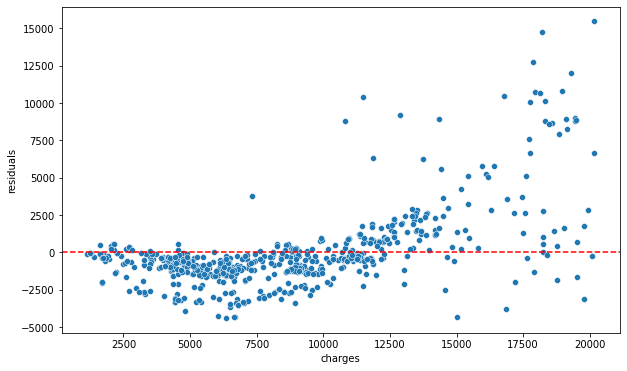

In [935]:
plt.figure(figsize = (10,6)) #residualların normal dağılıma uygun olması gerekir ki bir pattern izlemiyecek rastgele dağılacak
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")                                             #lineer regrasyona uygunluğunu kontrol ediyoruz
                                                                    #0 noktasi mükemmel tahmin ile gerçeklerin 0 olduğu nokta
plt.show()   

<AxesSubplot:xlabel='charges', ylabel='Density'>

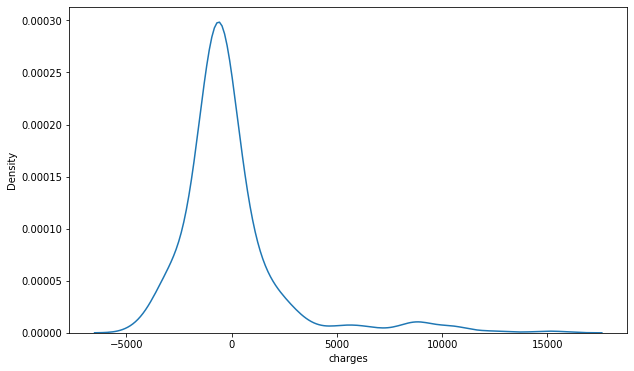

In [936]:
sns.kdeplot(residuals)  

# crossvalidate

In [937]:
from sklearn.metrics import SCORERS 

In [938]:
from sklearn.model_selection import cross_validate, cross_val_score

In [939]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [940]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.0,0.000000,0.580847,-1668.072115,-7.679096e+06,-2771.118128
2,0.0,0.000000,0.641855,-1640.734366,-7.435939e+06,-2726.891828
3,0.0,0.015625,0.697161,-1481.493038,-5.569097e+06,-2359.893419
4,0.0,0.000000,0.630437,-1740.804526,-8.408015e+06,-2899.657798
5,0.0,0.015622,0.505026,-1922.519321,-1.056430e+07,-3250.276416


In [941]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             6.110652e-01
test_neg_mean_absolute_error       -1.690725e+03
test_neg_mean_squared_error        -7.931289e+06
test_neg_root_mean_squared_error   -2.801568e+03
dtype: float64

In [942]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,6.147620e-01,6.580859e-01
mae,1.675595e+03,1.571269e+03
mse,7.849381e+06,6.652103e+06
rmse,2.801675e+03,2.579167e+03


In [943]:
lm.coef_

array([ 2.71779247e+03, -6.05480924e+00,  1.37244676e+03, -6.65641744e+14,
       -6.65641744e+14,  1.28873569e+16,  1.28873569e+16, -6.04370559e+13,
       -6.18503632e+13, -6.50276569e+13, -6.24295431e+13])

# ridge

In [944]:
from sklearn.linear_model import Ridge

In [945]:
ridge_model = Ridge(alpha=1, random_state=42)

In [946]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [947]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [948]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,6.147661e-01,6.582840e-01
mae,1.675238e+03,1.570802e+03
mse,7.849298e+06,6.648250e+06
rmse,2.801660e+03,2.578420e+03


In [949]:
pd.concat([ls, rs], axis=1) 

,linear_train,linear_test,ridge_train,ridge_test
R2,6.147620e-01,6.580859e-01,6.147661e-01,6.582840e-01
mae,1.675595e+03,1.571269e+03,1.675238e+03,1.570802e+03
mse,7.849381e+06,6.652103e+06,7.849298e+06,6.648250e+06
rmse,2.801675e+03,2.579167e+03,2.801660e+03,2.578420e+03


# Choosing best alpha value with Cross-Validation

In [950]:
from sklearn.linear_model import RidgeCV

In [951]:
alpha_space = np.linspace(0.01, 1, 100)   #en iyi alpha modelini seçmeye lineer regrasyon overfitting
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [952]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [953]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [954]:
ridge_cv_model.alpha_ 

0.36000000000000004

In [955]:
ridge_cv_model.best_score_

-2801.6510192837536

In [956]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [957]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,6.147664e-01,6.582787e-01
mae,1.675040e+03,1.570550e+03
mse,7.849293e+06,6.648353e+06
rmse,2.801659e+03,2.578440e+03


In [958]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,6.147620e-01,6.580859e-01,6.147661e-01,6.582840e-01,6.147664e-01,6.582787e-01
mae,1.675595e+03,1.571269e+03,1.675238e+03,1.570802e+03,1.675040e+03,1.570550e+03
mse,7.849381e+06,6.652103e+06,7.849298e+06,6.648250e+06,7.849293e+06,6.648353e+06
rmse,2.801675e+03,2.579167e+03,2.801660e+03,2.578420e+03,2.801659e+03,2.578440e+03


# Lasso

In [959]:
from sklearn.linear_model import Lasso, LassoCV

In [960]:
lasso_model = Lasso(alpha=1, random_state=42)  #modeli sıfırlıyoruz parametreler aynı olmalı alınan scorlar bizi yanıltmasın diye
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [961]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [962]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") #model lasso ile underfit kalmış ridge ve lasso dada 
lss

,lasso_train,lasso_test
R2,6.147660e-01,6.583453e-01
mae,1.674885e+03,1.570356e+03
mse,7.849301e+06,6.647057e+06
rmse,2.801660e+03,2.578189e+03


In [963]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,6.147620e-01,6.580859e-01,6.147661e-01,6.582840e-01,6.147664e-01,6.582787e-01,6.147660e-01,6.583453e-01
mae,1.675595e+03,1.571269e+03,1.675238e+03,1.570802e+03,1.675040e+03,1.570550e+03,1.674885e+03,1.570356e+03
mse,7.849381e+06,6.652103e+06,7.849298e+06,6.648250e+06,7.849293e+06,6.648353e+06,7.849301e+06,6.647057e+06
rmse,2.801675e+03,2.579167e+03,2.801660e+03,2.578420e+03,2.801659e+03,2.578440e+03,2.801660e+03,2.578189e+03


# For Lasso CV with Default Alpha : 1

In [964]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [965]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.0,0.015620,0.580962,-1647.795037,-7.676998e+06,-2770.739558
2,0.0,0.000000,0.642066,-1641.277669,-7.431554e+06,-2726.087671
3,0.0,0.000000,0.697025,-1481.921642,-5.571604e+06,-2360.424467
4,0.0,0.000000,0.630387,-1738.379824,-8.409138e+06,-2899.851322
5,0.0,0.015625,0.504884,-1918.610453,-1.056733e+07,-3250.742926


In [966]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             6.110648e-01
test_neg_mean_absolute_error       -1.685597e+03
test_neg_mean_squared_error        -7.931325e+06
test_neg_root_mean_squared_error   -2.801569e+03
dtype: float64

In [967]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,6.147660e-01,6.583453e-01
mae,1.674885e+03,1.570356e+03
mse,7.849301e+06,6.647057e+06
rmse,2.801660e+03,2.578189e+03


# Choosing best alpha value with Cross-Validation

In [968]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [969]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [970]:
lasso_cv_model.alpha_

1.0

In [971]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [972]:
lasso_cv_model.mse_path_[-1].mean()

7931797.72263771

In [973]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [974]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")#0.01 alpha değeri ile dahada scorların iyileştiğini görebiliyoruz
lcs

,lasso_cv_train,lasso_cv_test
R2,6.147660e-01,6.583453e-01
mae,1.674885e+03,1.570356e+03
mse,7.849301e+06,6.647057e+06
rmse,2.801660e+03,2.578189e+03


In [975]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1) #10 feature ile %98 lik bir modelmi istiyorsun diye sormalıyız

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,6.147620e-01,6.580859e-01,6.147661e-01,6.582840e-01,6.147664e-01,6.582787e-01,6.147660e-01,6.583453e-01,6.147660e-01,6.583453e-01
mae,1.675595e+03,1.571269e+03,1.675238e+03,1.570802e+03,1.675040e+03,1.570550e+03,1.674885e+03,1.570356e+03,1.674885e+03,1.570356e+03
mse,7.849381e+06,6.652103e+06,7.849298e+06,6.648250e+06,7.849293e+06,6.648353e+06,7.849301e+06,6.647057e+06,7.849301e+06,6.647057e+06
rmse,2.801675e+03,2.579167e+03,2.801660e+03,2.578420e+03,2.801659e+03,2.578440e+03,2.801660e+03,2.578189e+03,2.801660e+03,2.578189e+03


# Elastic net

In [976]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [977]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)    

ElasticNet(alpha=1, random_state=42)

In [978]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [979]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,5.447496e-01,5.875593e-01
mae,2.169255e+03,2.081360e+03
mse,9.275913e+06,8.024232e+06
rmse,3.045638e+03,2.832708e+03


# Grid Search

In [980]:
from sklearn.model_selection import GridSearchCV #

In [981]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [982]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],   #alpha değerinin bir sınırı yok ne kadar artarsa çalışma maaliyeti
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]} 

In [983]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [984]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+09, tolerance: 2.463e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.4s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.662e+08, tolerance: 2.392e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.3s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e+09, tolerance: 2.463e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.4s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+08, tolerance: 2.330e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.3s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+09, tolerance: 2.372e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.3s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.730e+08, tolerance: 2.463e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.3s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+08, tolerance: 2.392e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.4s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.971e+08, tolerance: 2.463e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.3s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+08, tolerance: 2.330e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.3s


C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.212e+08, tolerance: 2.372e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.4s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.012, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [985]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [986]:
grid_model.best_score_

-2801.569188931171

# Final

In [987]:
df_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.296556,29.978109,4,0,1,1,0,0,1,0,0
1,40.367560,27.927669,5,1,0,1,0,0,0,1,0
2,32.881563,41.576865,5,0,1,1,0,0,0,0,1
3,62.000000,30.495000,2,1,0,1,0,0,1,0,0
4,32.476173,30.322774,4,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
446,43.000000,35.531966,2,0,1,0,1,0,0,1,0
447,31.374148,28.278549,4,0,1,1,0,1,0,0,0
448,50.370750,26.766297,4,1,0,1,0,0,1,0,0
449,49.201678,31.396840,4,1,0,1,0,0,1,0,0


In [988]:
df_test.children.value_counts()

5    84
3    77
0    75
1    74
4    73
2    68
Name: children, dtype: int64

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

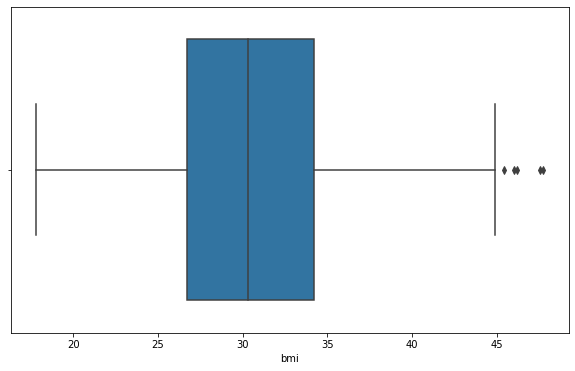

In [989]:
sns.boxplot(df_test.bmi)

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

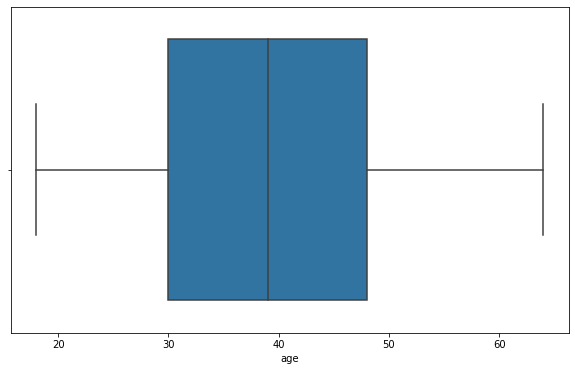

In [990]:
sns.boxplot(df_test.age)

In [991]:
df_test["age"]=df_test.age.round()

In [992]:
df_test_scaled=scaler.transform(df_test)

In [993]:
y_fin_pred=grid_model.predict(df_test_scaled)
pd.Series(y_fin_pred)

0       9354.189022
1       9970.872457
2       8332.275652
3      12831.822084
4      22153.769758
           ...     
446    20653.668654
447     9741.215166
448    11682.287091
449    11453.846599
450    20248.351403
Length: 451, dtype: float64

In [994]:
df_test["y_fin_pred"]=y_fin_pred

In [995]:
C9264=df_test

In [996]:
df_test.head(10)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,y_fin_pred
0,39.0,29.978109,4,0,1,1,0,0,1,0,0,9354.189022
1,40.0,27.927669,5,1,0,1,0,0,0,1,0,9970.872457
2,33.0,41.576865,5,0,1,1,0,0,0,0,1,8332.275652
3,62.0,30.495000,2,1,0,1,0,0,1,0,0,12831.822084
4,32.0,30.322774,4,0,1,0,1,1,0,0,0,22153.769758
5,22.0,32.305187,5,0,1,1,0,1,0,0,0,8486.048155
6,46.0,34.097296,3,0,1,1,0,0,1,0,0,10153.161152
7,39.0,25.238490,5,0,1,1,0,0,0,1,0,9902.322655
8,42.0,31.214778,5,0,1,1,0,0,0,1,0,10575.421465
9,19.0,25.555000,0,0,1,1,0,0,1,0,0,1734.528655


In [997]:
df_test.to_csv("C9264.csv", index=False)